### Name: Amodemaja Olalekan Quzim
### Student Number: 500662930
### Module code: ABJ 4012
### Module Title: Coding for Business application
### Data: 01/01/2024
### Purpose: Bank Marketing Data Analysis

### TASK 1
### Data Cleaning and Manipulation
### Import our dataset, Check the structure of the data and Clean the data

In [553]:
pip install imblearn


[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [554]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [555]:
import pandas as pd
import seaborn as sns
import random as rand 
import os

In [556]:

column_names = ["age","job", "marital", "education","default","housing","loan","contact","month","day_of_week",
                   "duration","campaign","pdays","previous","poutcome","emp.var.rate","cons.price.idx",
                   "cons.conf.idx", "euribor3m","nr.employed","y"]
#Import Data from file location
Bank_market_data = pd.read_csv(r"C:/Users/Windows/Desktop/Rexercise/bank-additional-full.csv", sep=';', header=None, names = column_names, skiprows=1, quoting=3)

In [557]:
# after importing the data into Bank_market_data DataFrame

# Remove double quotes from all columns
Bank_market_data = Bank_market_data.applymap(lambda x: x.replace('"', '') if isinstance(x, str) else x)
print(Bank_market_data.head())
print(Bank_market_data.tail())
print(Bank_market_data.tail())
Bank_market_data.dtypes

C:\Users\Windows\AppData\Local\Temp\ipykernel_11736\2605265126.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Bank_market_data = Bank_market_data.applymap(lambda x: x.replace('"', '') if isinstance(x, str) else x)


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [558]:
# Corrected days_mapping dictionary
days_mapping = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}

# Map the abbreviated day names to numerical values and convert the column to int64
Bank_market_data['day_of_week'] = Bank_market_data['day_of_week'].map(days_mapping).astype('int64')


# Drop rows with any missing values in Bank_market_data and store the cleaned DataFrame in Bank_market_clean
Bank_market_data.dropna(axis=0, inplace=True)

# Assign the cleaned DataFrame to Bank_market_clean i
Bank_market_clean = Bank_market_data.copy()  

# Print information about the cleaned DataFrame
print(Bank_market_clean.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [559]:
# Check for missing values in the entire DataFrame
missing_values = Bank_market_data.isnull()

# Check for non-missing values in the entire DataFrame
non_missing_values = Bank_market_data.notnull()
# Display information about the DataFrame including non-null counts
Bank_market_data.info()
# Generate summary statistics for numerical columns
summary = Bank_market_data.describe()
#show missing values if any
print(missing_values)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [560]:
#summary stat and insights of the cleaned data
print(Bank_market_clean.describe())
# Using Bank_market_clean as our cleaned DataFrame

# Loop through each column and print unique values
for column in Bank_market_clean.columns:
    unique_values = Bank_market_clean[column].unique()
    print(f"Unique values in '{column}':\n{unique_values}\n")


               age   day_of_week      duration      campaign         pdays  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406      2.979581    258.285010      2.567593    962.475454   
std       10.42125      1.411514    259.279249      2.770014    186.910907   
min       17.00000      1.000000      0.000000      1.000000      0.000000   
25%       32.00000      2.000000    102.000000      1.000000    999.000000   
50%       38.00000      3.000000    180.000000      2.000000    999.000000   
75%       47.00000      4.000000    319.000000      3.000000    999.000000   
max       98.00000      5.000000   4918.000000     56.000000    999.000000   

           previous  emp.var.rate  cons.price.idx  cons.conf.idx  \
count  41188.000000  41188.000000    41188.000000   41188.000000   
mean       0.172963      0.081886       93.575664     -40.502600   
std        0.494901      1.570960        0.578840       4.628198   
min        0.000000     -

### VISUALIZATION

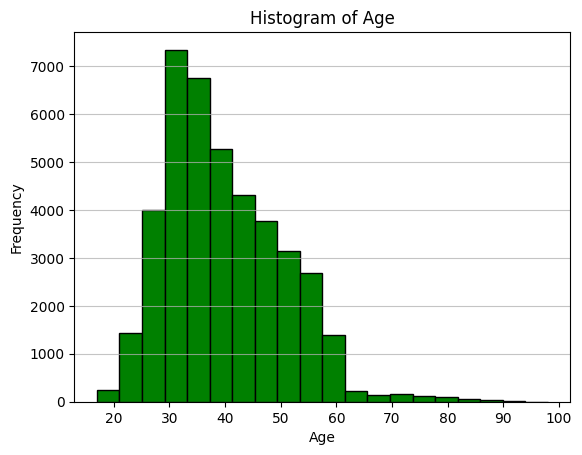

In [561]:
import matplotlib.pyplot as plt

# Histogram of age column
plt.hist(Bank_market_clean['age'], bins=20, color='green', edgecolor='black')  # Adjust the number of bins for better visualization
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


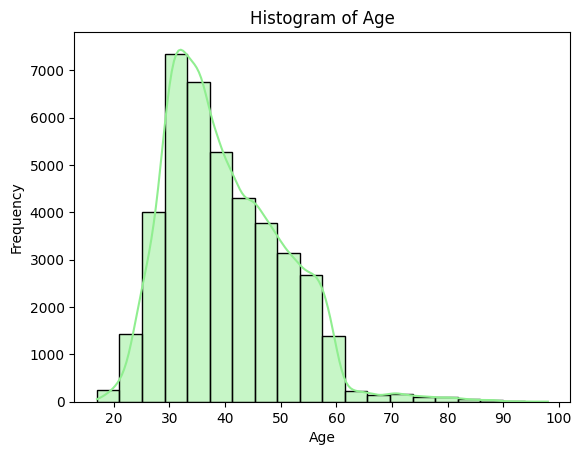

In [562]:
import seaborn as sns
import matplotlib.pyplot as plt

# Using 'age' as the column name in Bank_market_clean DataFrame
sns.histplot(data=Bank_market_clean, x='age', bins=20, kde=True, color='lightgreen')  # Adjust the number of bins for better visualization
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


### ANALYZING AND VISUALIZING CATEGORICAL VARIABLE

In [563]:
# As Bank_market_clean is our DataFrame
categorical_data = Bank_market_clean.select_dtypes(include='object')  # Selecting columns with object (categorical) data type

# Display the names of the identified categorical columns
print("Categorical Variables:")
print(categorical_data.columns)

Categorical Variables:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [564]:
# As 'categorical_data' contains the identified categorical columns
for column in categorical_data.columns:
    print(f"\nFrequency distribution of '{column}':")
    print(categorical_data[column].value_counts())
    print("-" * 30)



Frequency distribution of 'job':
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
------------------------------

Frequency distribution of 'marital':
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
------------------------------

Frequency distribution of 'education':
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
------------------------------

Frequency distribution of 'default':
default
no         32588
unknown     8597
yes            3
Name: count, dtype

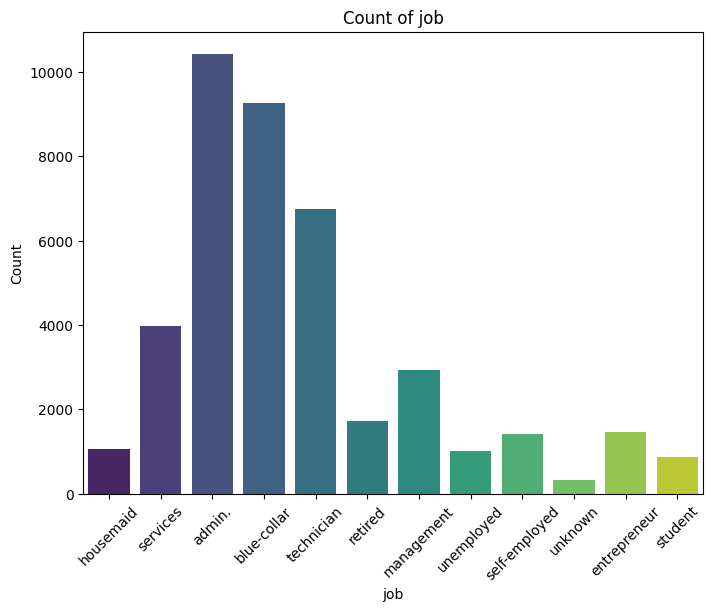

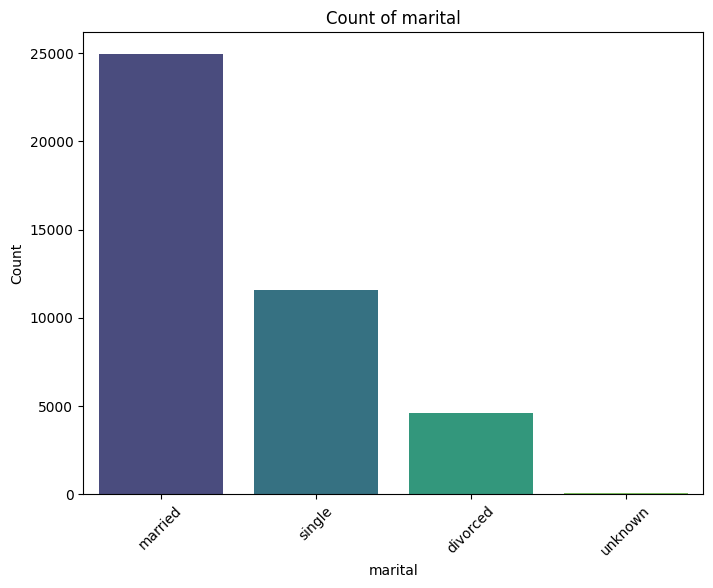

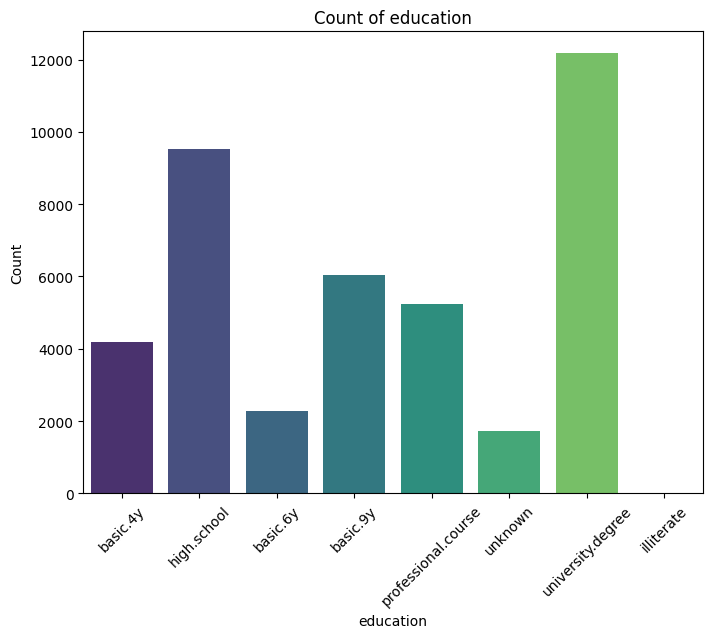

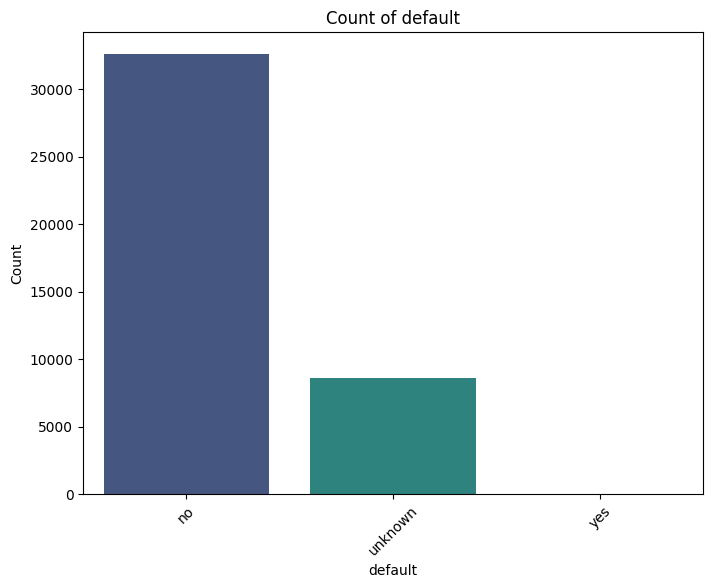

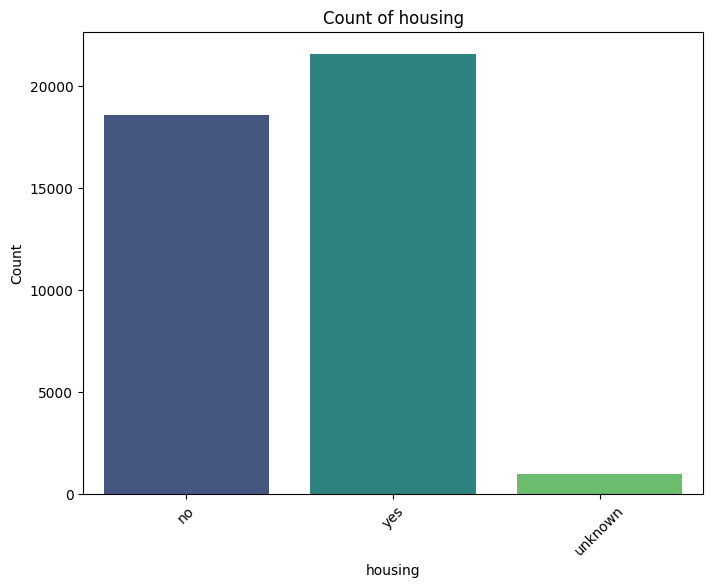

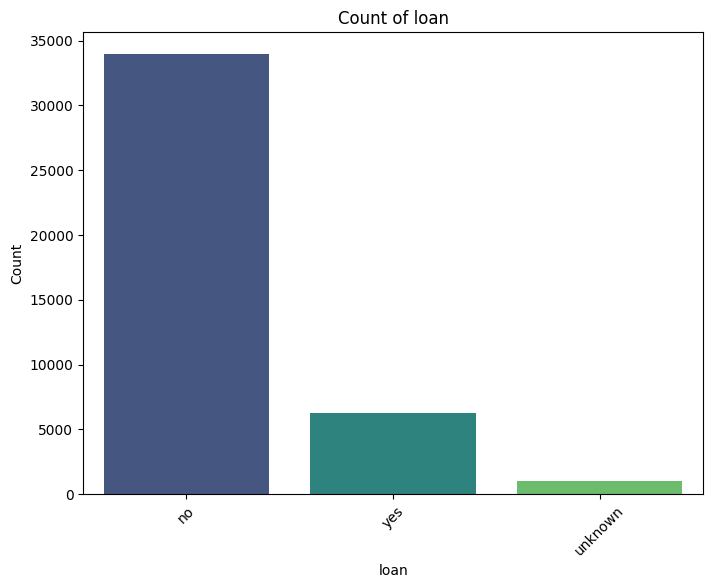

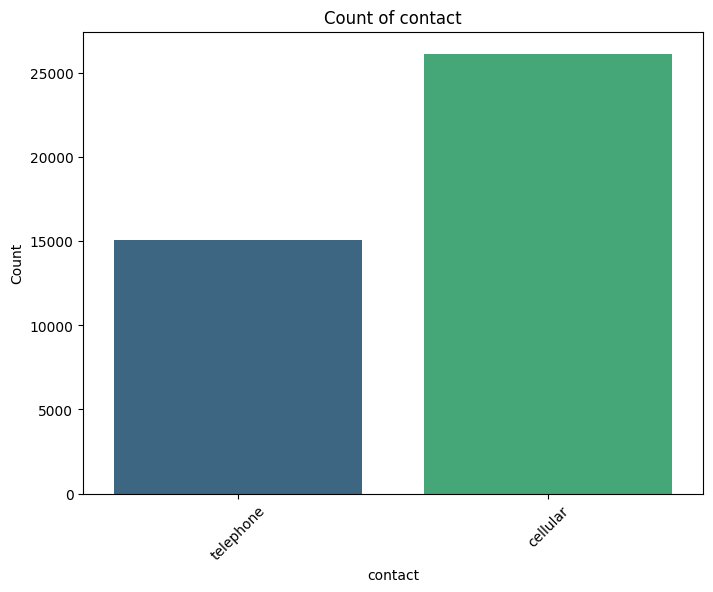

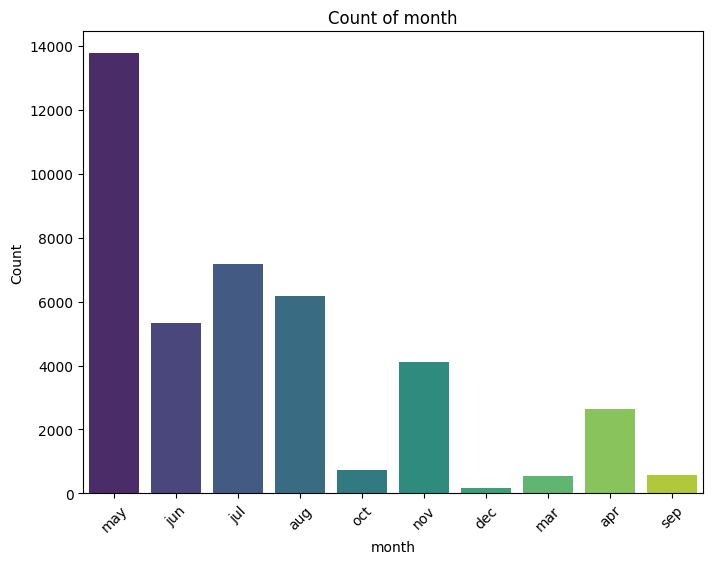

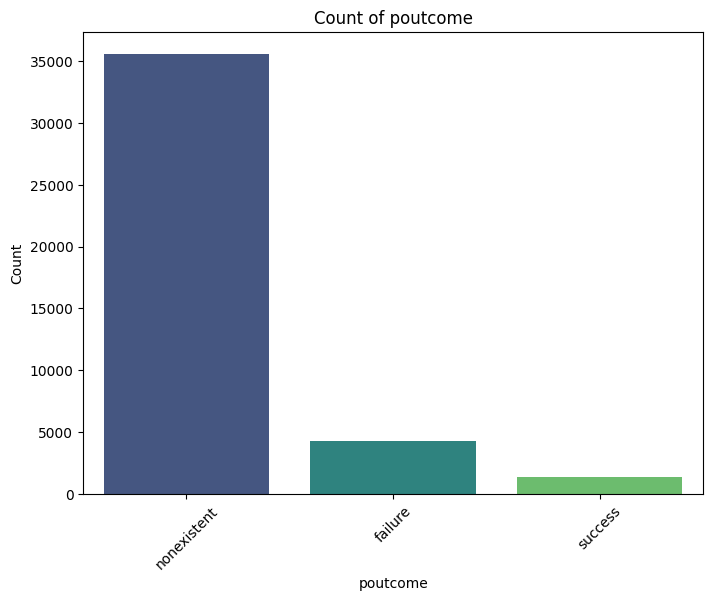

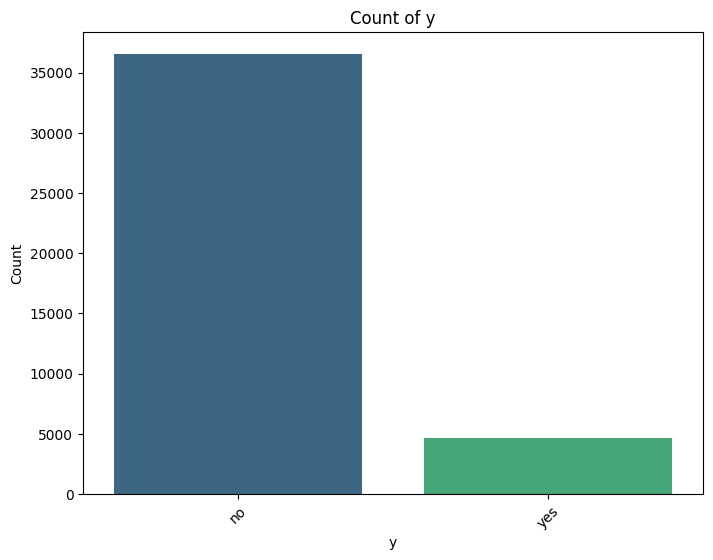

In [565]:
import seaborn as sns
import matplotlib.pyplot as plt

# Using 'categorical_data' as the identified categorical columns
for column in categorical_data.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=categorical_data, hue= column, palette='viridis')
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()



In [566]:
# Using 'categorical_data'  which contains the identified categorical columns and 'y' is the dependent variable
for column in categorical_data.columns:
    cross_tab = pd.crosstab(categorical_data[column], Bank_market_clean['y'])
    print(f"\nCross-tabulation between '{column}' and 'y':")
    print(cross_tab)
    print("-" * 30)



Cross-tabulation between 'job' and 'y':
y                no   yes
job                      
admin.         9070  1352
blue-collar    8616   638
entrepreneur   1332   124
housemaid       954   106
management     2596   328
retired        1286   434
self-employed  1272   149
services       3646   323
student         600   275
technician     6013   730
unemployed      870   144
unknown         293    37
------------------------------

Cross-tabulation between 'marital' and 'y':
y            no   yes
marital              
divorced   4136   476
married   22396  2532
single     9948  1620
unknown      68    12
------------------------------

Cross-tabulation between 'education' and 'y':
y                       no   yes
education                       
basic.4y              3748   428
basic.6y              2104   188
basic.9y              5572   473
high.school           8484  1031
illiterate              14     4
professional.course   4648   595
university.degree    10498  1670
unknown     

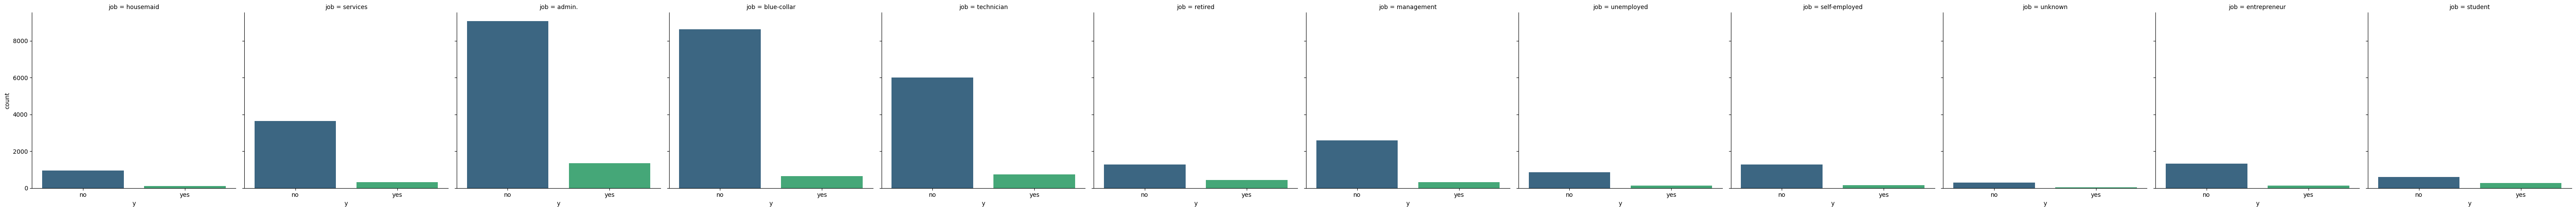

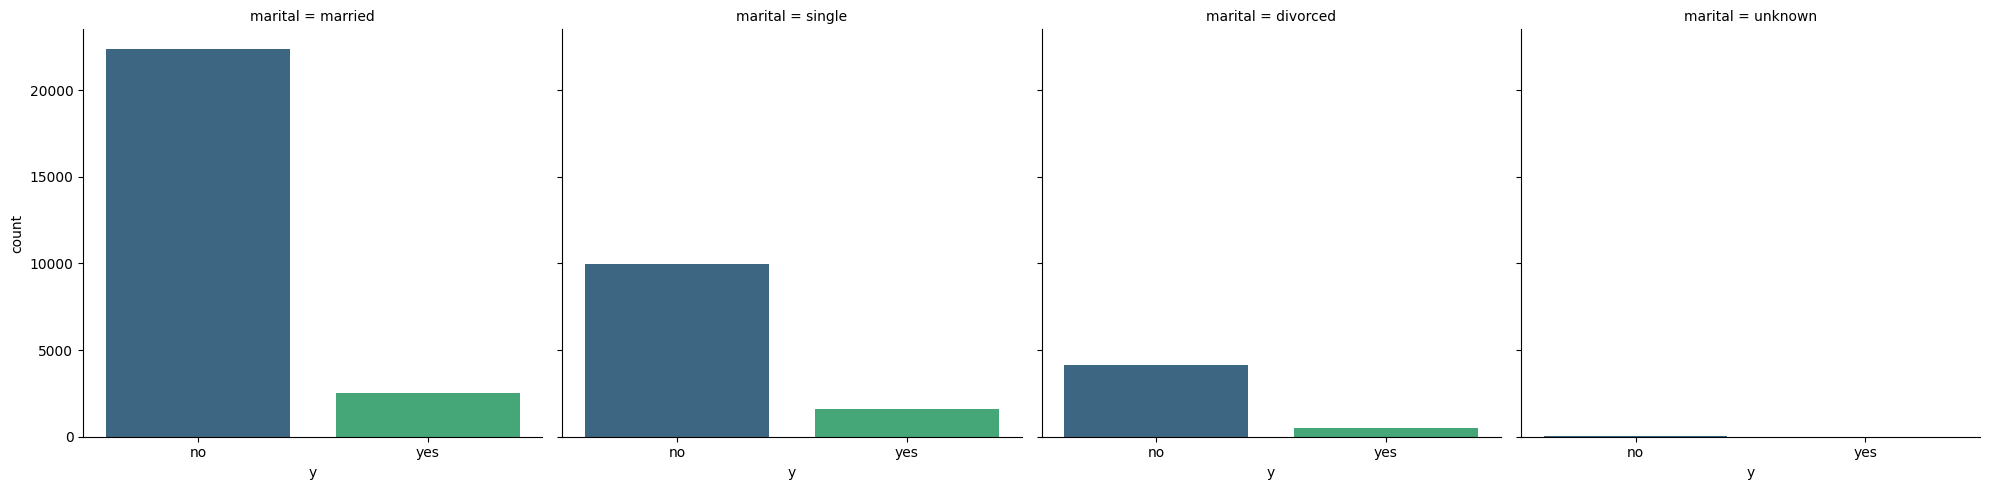

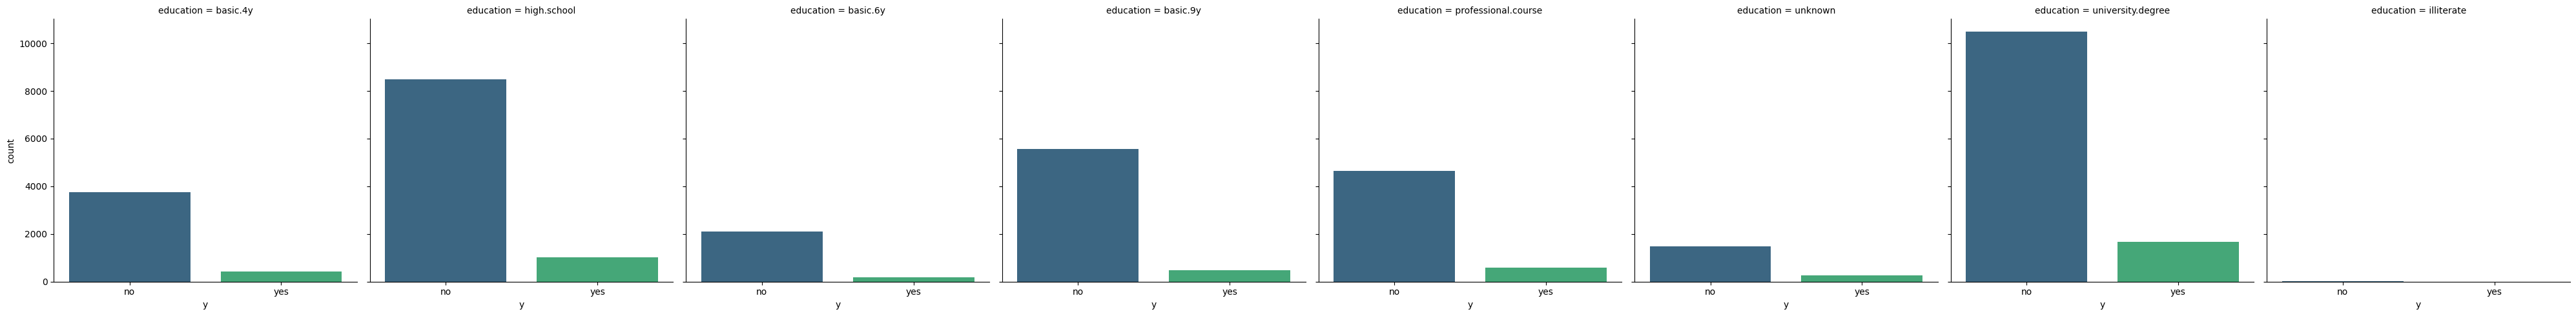

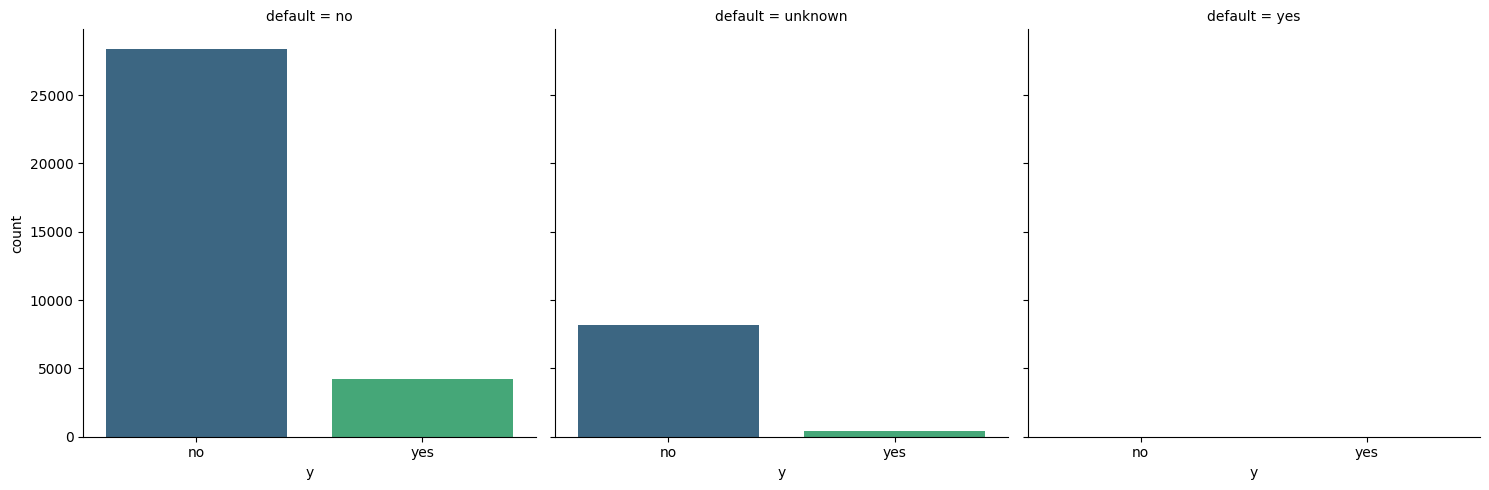

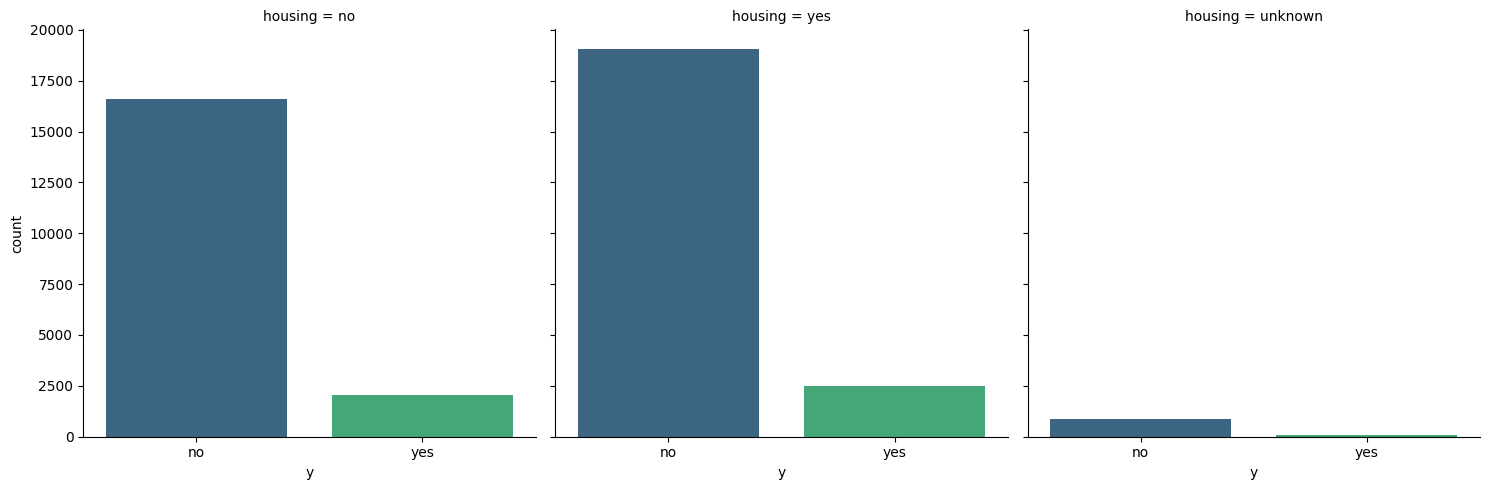

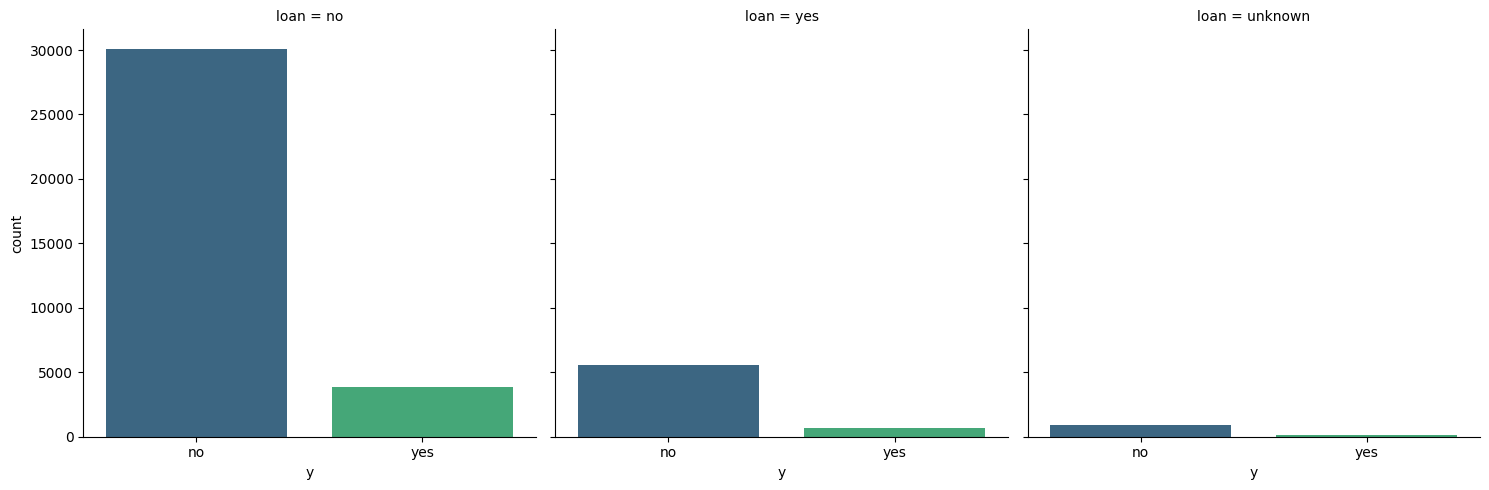

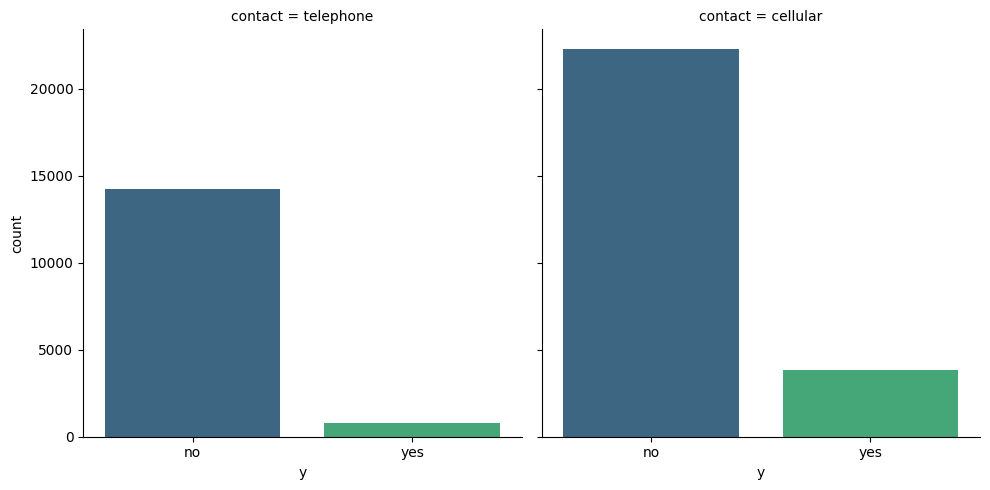

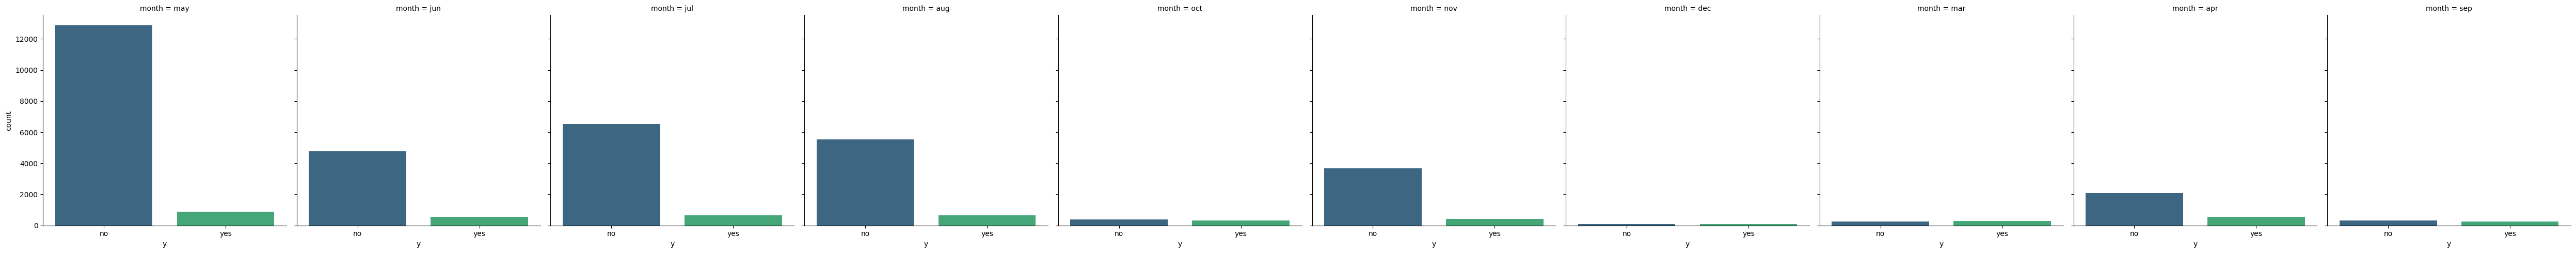

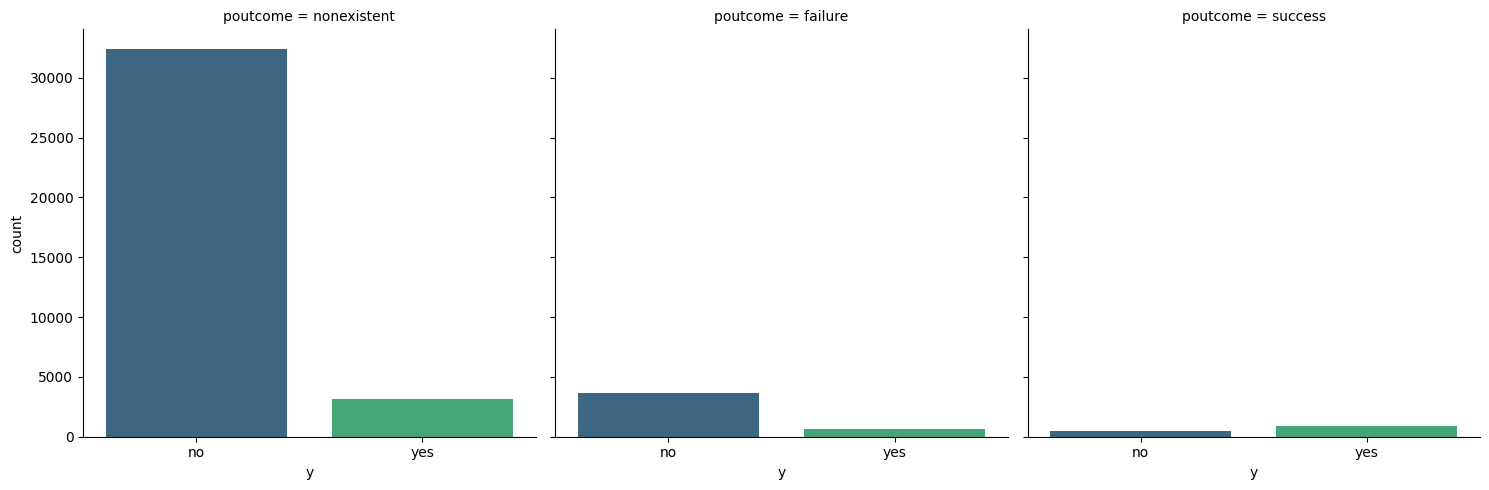

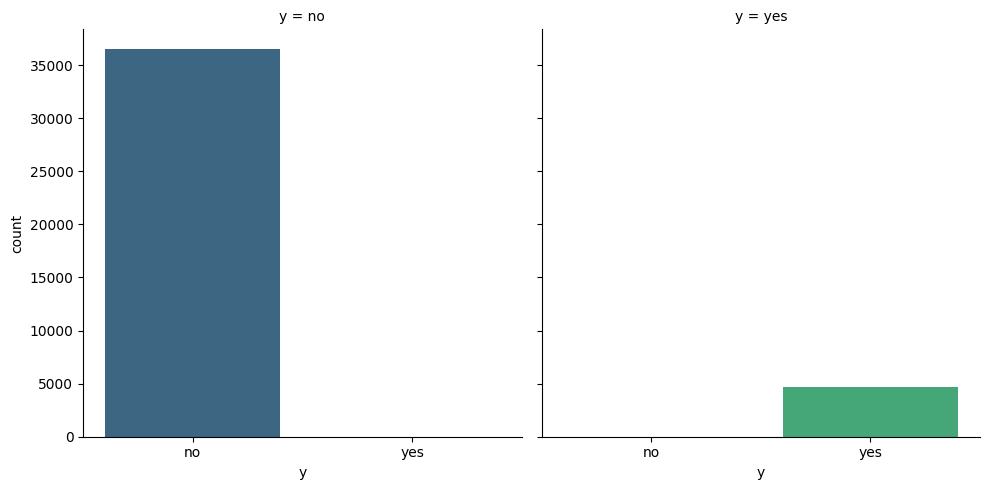

In [567]:
#plot categorical features
for categorical_feature in categorical_data:
    sns.catplot(x='y', col=categorical_feature, kind='count', hue = 'y', legend = False, data=Bank_market_clean, palette='viridis')
    plt.show()


In [568]:
# as 'y' is the dependent variable and 'job' is a categorical predictor variable
cross_tab = pd.crosstab(Bank_market_clean['job'], Bank_market_clean['y'])
print(cross_tab)


y                no   yes
job                      
admin.         9070  1352
blue-collar    8616   638
entrepreneur   1332   124
housemaid       954   106
management     2596   328
retired        1286   434
self-employed  1272   149
services       3646   323
student         600   275
technician     6013   730
unemployed      870   144
unknown         293    37


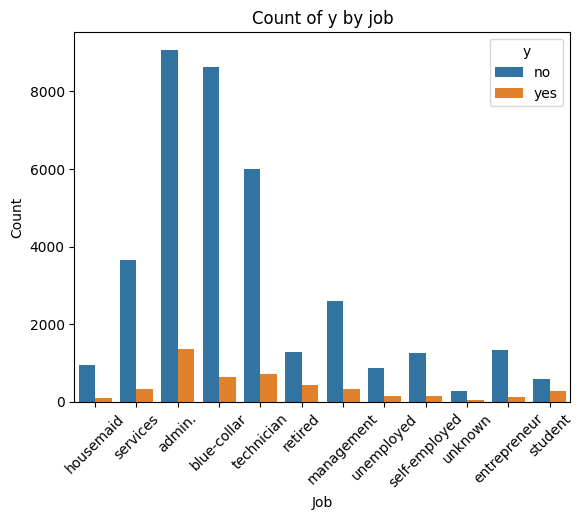

In [569]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example with 'job' and 'y' variables
sns.countplot(x='job', hue='y', data=Bank_market_clean)
plt.title('Count of y by job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [570]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [571]:
from scipy.stats import chi2_contingency

# Example with 'job' and 'y' variables
cross_tab = pd.crosstab(Bank_market_clean['job'], Bank_market_clean['y'])
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")


Chi-Square Statistic: 961.2424403289555
P-value: 4.189763287563623e-199


### ANALYIZING AND VISUALIZING NUMERICAL VARIABLES

In [572]:
# Assuming numerical_data contains numerical columns
numerical_data = Bank_market_clean.select_dtypes(include='number')  # Selecting columns with object (categorical) data type

summary_stats = numerical_data.describe()
print(summary_stats)


               age   day_of_week      duration      campaign         pdays  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406      2.979581    258.285010      2.567593    962.475454   
std       10.42125      1.411514    259.279249      2.770014    186.910907   
min       17.00000      1.000000      0.000000      1.000000      0.000000   
25%       32.00000      2.000000    102.000000      1.000000    999.000000   
50%       38.00000      3.000000    180.000000      2.000000    999.000000   
75%       47.00000      4.000000    319.000000      3.000000    999.000000   
max       98.00000      5.000000   4918.000000     56.000000    999.000000   

           previous  emp.var.rate  cons.price.idx  cons.conf.idx  \
count  41188.000000  41188.000000    41188.000000   41188.000000   
mean       0.172963      0.081886       93.575664     -40.502600   
std        0.494901      1.570960        0.578840       4.628198   
min        0.000000     -

In [573]:
# Assuming numerical_data contains numerical columns
numerical_data_head = Bank_market_clean.select_dtypes(include='number').head()
print(numerical_data_head)


   age  day_of_week  duration  campaign  pdays  previous  emp.var.rate  \
0   56            1       261         1    999         0           1.1   
1   57            1       149         1    999         0           1.1   
2   37            1       226         1    999         0           1.1   
3   40            1       151         1    999         0           1.1   
4   56            1       307         1    999         0           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0          93.994          -36.4      4.857       5191.0  
1          93.994          -36.4      4.857       5191.0  
2          93.994          -36.4      4.857       5191.0  
3          93.994          -36.4      4.857       5191.0  
4          93.994          -36.4      4.857       5191.0  


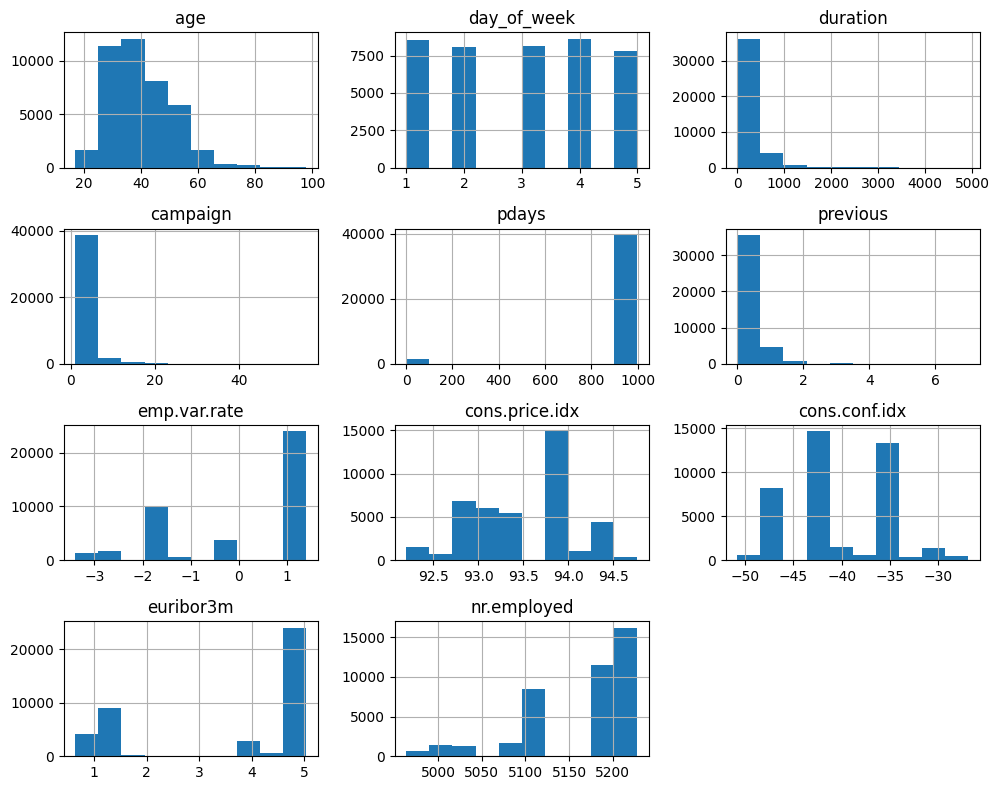

In [574]:
import matplotlib.pyplot as plt

# Assuming 'numerical_data' contains numerical columns
numerical_data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


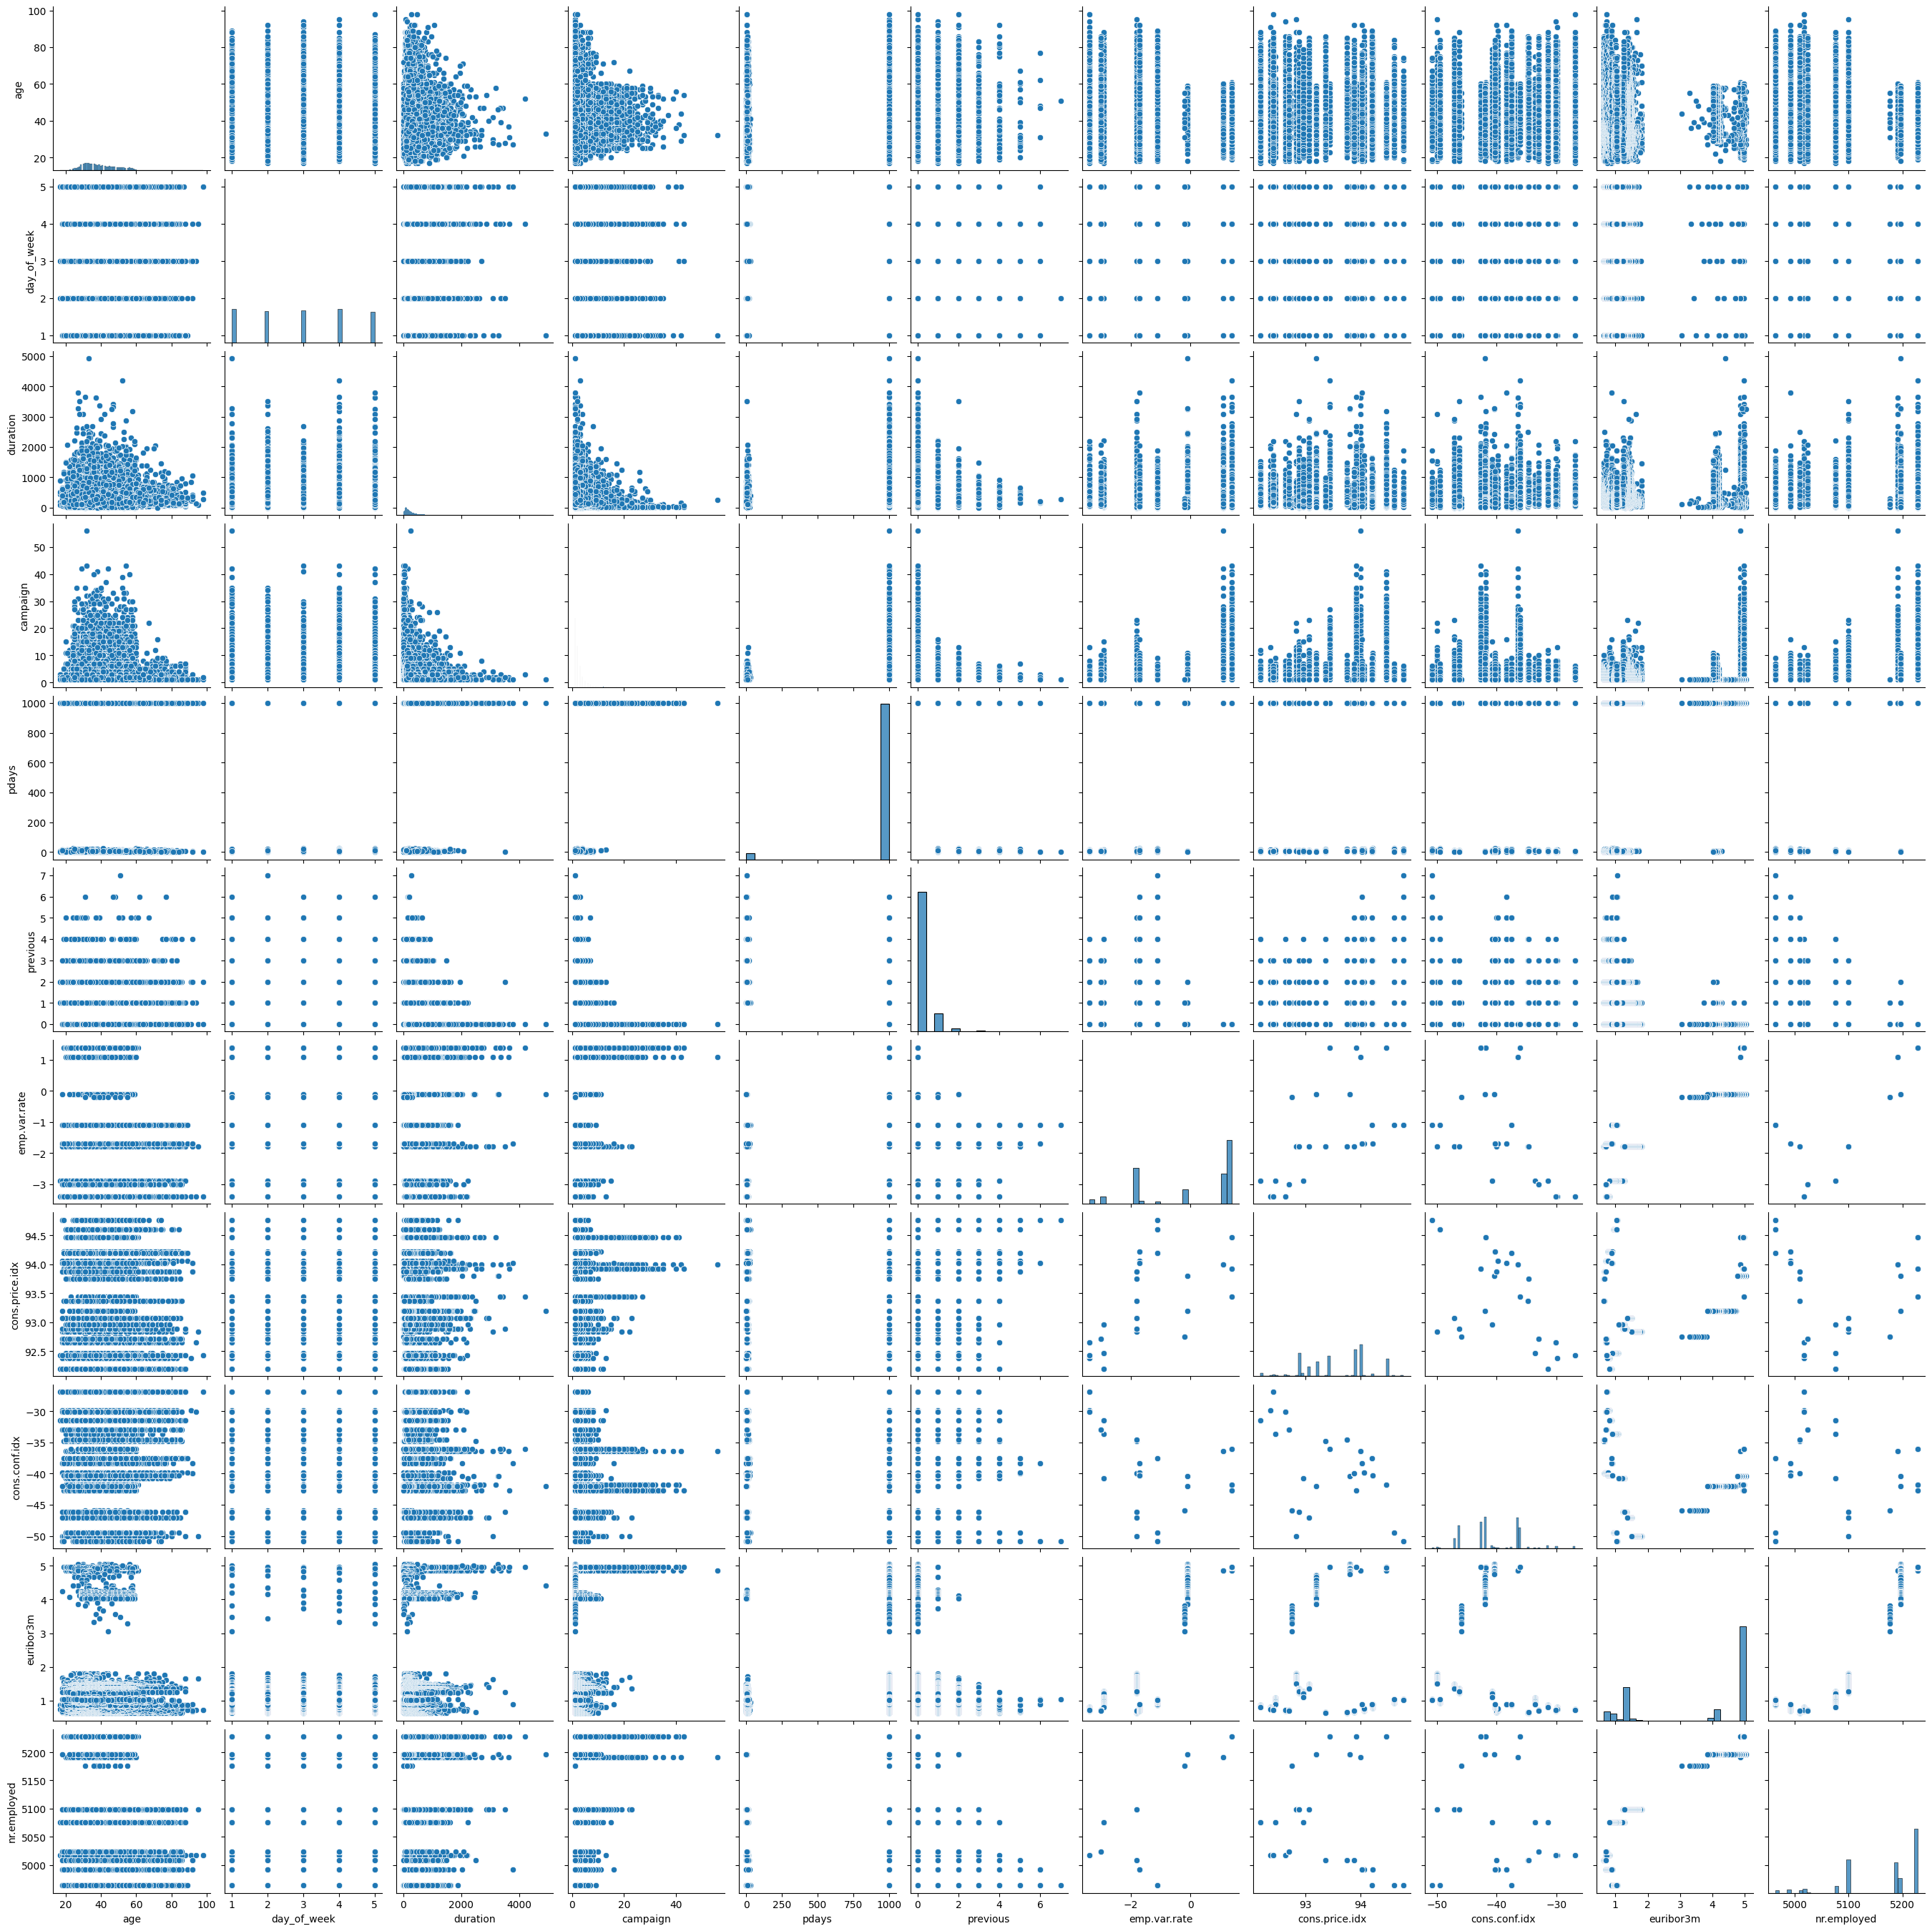

In [575]:
import seaborn as sns

# Assuming 'numerical_data' contains numerical columns, plot pair column
sns.pairplot(numerical_data)
plt.show()


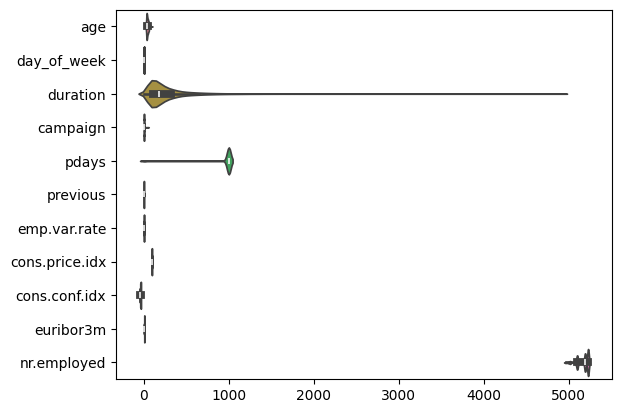

In [576]:
import seaborn as sns

# Assuming 'numerical_data' contains numerical columns
sns.violinplot(data=numerical_data, orient='h')
plt.show()



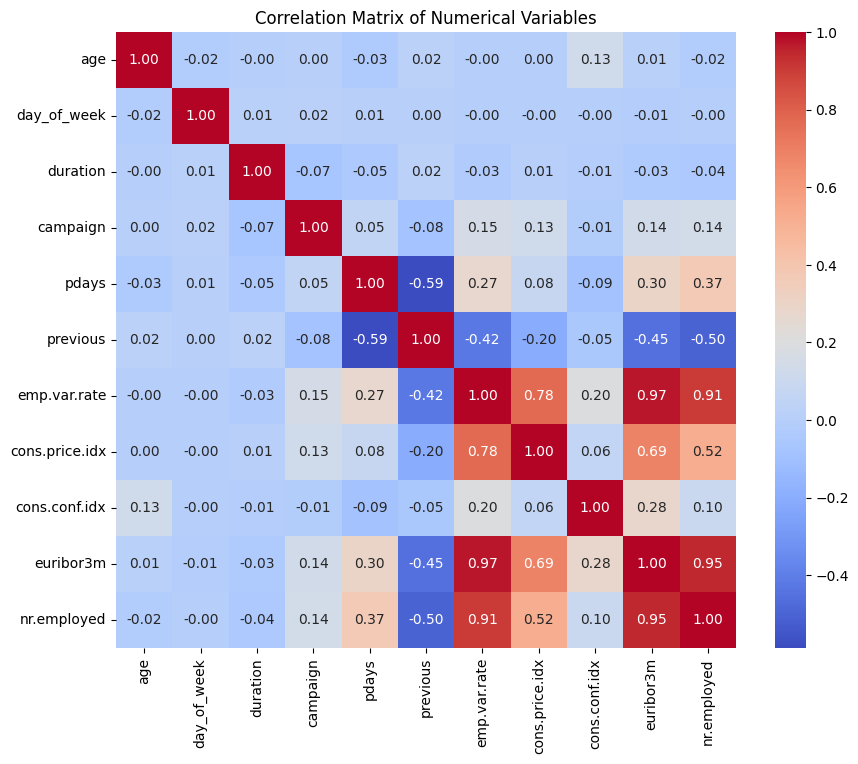

In [577]:
import seaborn as sns
import matplotlib.pyplot as plt

# using Bank_market_clean as our DataFrame containing numerical columns
numerical_data = Bank_market_clean.select_dtypes(include='number')  # Selecting numerical columns

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


### Discrete and Continuous Variables 

In [578]:
# Assuming 'numerical_data' contains numerical columns
for col in numerical_data.columns:
    unique_count = numerical_data[col].nunique()
    if unique_count < 20:  # Example threshold, adjust as needed
        print(f"{col} is a discrete variable with {unique_count} unique values.")
    else:
        print(f"{col} is a continuous variable.")


age is a continuous variable.
day_of_week is a discrete variable with 5 unique values.
duration is a continuous variable.
campaign is a continuous variable.
pdays is a continuous variable.
previous is a discrete variable with 8 unique values.
emp.var.rate is a discrete variable with 10 unique values.
cons.price.idx is a continuous variable.
cons.conf.idx is a continuous variable.
euribor3m is a continuous variable.
nr.employed is a discrete variable with 11 unique values.


In [579]:
#Count for Discrete data 
discrete_data =[feature for feature in numerical_data if len(Bank_market_clean[feature].unique())<30]
print('Discrete Data Count: {}'. format(len(discrete_data)))

Discrete Data Count: 7


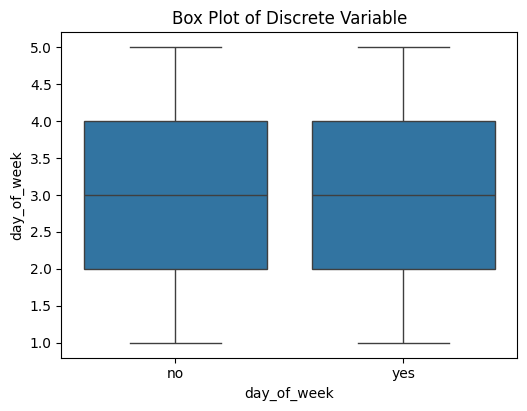

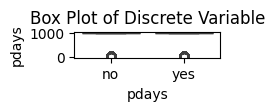

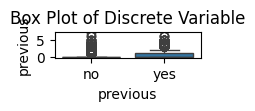

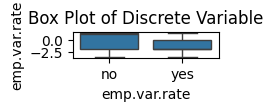

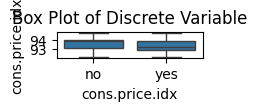

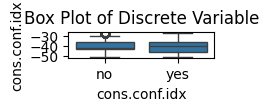

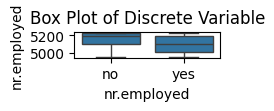

In [580]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1

# Box plot for discrete values
for feature in discrete_data:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x= 'y', y= Bank_market_clean[feature], data = Bank_market_clean)
    plt.title('Box Plot of Discrete Variable')
    plt.xlabel(feature)
    plotnumber+=1
    plt.show()

In [581]:
continuous_data =[feature for feature in numerical_data if len(Bank_market_clean[feature].unique())<30]
print('Continuous Data Count: {}'. format(len(continuous_data)))

Continuous Data Count: 7


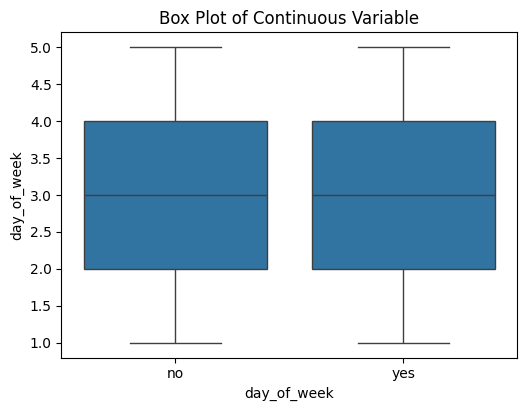

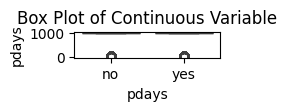

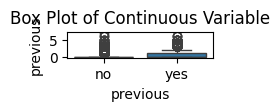

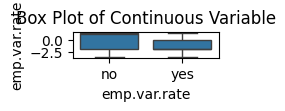

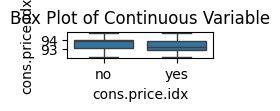

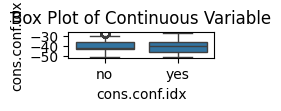

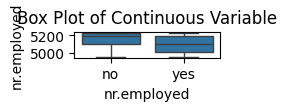

In [582]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1

# Box plot for discrete values
for feature in continuous_data:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x= 'y', y= Bank_market_clean[feature], data = Bank_market_clean)
    plt.title('Box Plot of Continuous Variable')
    plt.xlabel(feature)
    plotnumber+=1
    plt.show()

### SAMPLING THE DATASET

In [583]:
import pandas as pd

# Set a random seed for reproducibility
random_seed = 42  

# Randomly extract 20% of the data and store it in a new DataFrame
sampled_data = Bank_market_clean.sample(frac=0.2, random_state=random_seed)

# Display the shape or basic information of the sampled data
print("Shape of Sampled Data:", sampled_data.shape)

# Now 'sampled_data' contains 20% of the original 'Bank_market_clean' data for subsequent analysis


Shape of Sampled Data: (8238, 21)


In [584]:
sampled_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
32884,57,technician,married,high.school,no,no,yes,cellular,may,1,...,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,no
3169,55,unknown,married,unknown,unknown,yes,no,telephone,may,4,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
32206,33,blue-collar,married,basic.9y,no,no,no,cellular,may,5,...,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1,no
9403,36,admin.,married,high.school,no,no,no,telephone,jun,5,...,4,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,no
14020,27,housemaid,married,high.school,no,yes,no,cellular,jul,5,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no


In [585]:
#group sampled data using y column
sampled_data['y'].groupby(sampled_data['y']).count()

y
no     7303
yes     935
Name: y, dtype: int64

In [586]:
sampled_data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week         int64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [587]:
# print unique value of the sampled dataset
for column in sampled_data.columns:
    unique_values = sampled_data[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("-" * 30)


Unique values in 'age':
[57 55 33 36 27 58 48 51 24 34 42 43 56 26 53 37 46 59 49 30 45 31 41 38
 47 69 50 25 39 44 63 52 60 35 77 32 28 40 29 54 81 70 21 22 74 80 62 61
 68 86 23 71 67 65 20 19 66 75 18 72 82 85 88 83 78 64 17 76 73 79 94]
------------------------------
Unique values in 'job':
['technician' 'unknown' 'blue-collar' 'admin.' 'housemaid' 'retired'
 'services' 'entrepreneur' 'unemployed' 'management' 'self-employed'
 'student']
------------------------------
Unique values in 'marital':
['married' 'divorced' 'single' 'unknown']
------------------------------
Unique values in 'education':
['high.school' 'unknown' 'basic.9y' 'professional.course'
 'university.degree' 'basic.4y' 'basic.6y' 'illiterate']
------------------------------
Unique values in 'default':
['no' 'unknown']
------------------------------
Unique values in 'housing':
['no' 'yes' 'unknown']
------------------------------
Unique values in 'loan':
['yes' 'no' 'unknown']
------------------------------
Unique va

#### REMOVING UNKNOWN VALUES AND COVERTING YES AND NO TO 0 and 1

In [588]:
# using 'sampled_data' as our DataFrame and 'column_name' is the column where 'unknown' values exist
# using 'sampled_data' is your DataFrame
sampled_data_new = sampled_data[(sampled_data['loan'] != 'unknown') & (sampled_data['default'] != 'unknown') & (sampled_data['housing'] != 'unknown')]

# Check unique values in the 'default' column after dropping 'unknown' values
print("Unique values in 'default' column:")
print(sampled_data_new['default'].unique())


Unique values in 'default' column:
['no']


In [589]:
# using 'column_name' as the column where 'unknown' values existed
print(sampled_data_new['loan'].unique())
# or
print(sampled_data_new['loan'].value_counts())

print(sampled_data_new['default'].unique())
# or
print(sampled_data_new['default'].value_counts())

print(sampled_data_new['housing'].unique())
# or
print(sampled_data_new['housing'].value_counts())


['yes' 'no']
loan
no     5366
yes     995
Name: count, dtype: int64
['no']
default
no    6361
Name: count, dtype: int64
['no' 'yes']
housing
yes    3424
no     2937
Name: count, dtype: int64


In [590]:
# 'sampled_data' is the DataFrame containing 'No' and 'Yes' values in certain columns
columns_to_convert = ['default','housing', 'loan', 'y']  # Replace 'column1', 'column2' with actual column names

# Mapping 'No' to 0 and 'Yes' to 1 in selected columns
for col in columns_to_convert:
    sampled_data_new[col].replace ({'yes' : 1, 'no': 0}, inplace=True)


C:\Users\Windows\AppData\Local\Temp\ipykernel_11736\1869222100.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_data_new[col].replace ({'yes' : 1, 'no': 0}, inplace=True)


In [591]:
# Assuming 'sampled_data_new' is your DataFrame
sampled_data_new['contact'] = sampled_data_new['contact'].map({'cellular': 0, 'telephone': 1})

# Check unique values in the 'contact' column after conversion
print("Unique values in 'contact' column:")
print(sampled_data_new['contact'].unique())


Unique values in 'contact' column:
[0 1]


C:\Users\Windows\AppData\Local\Temp\ipykernel_11736\4228919011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_data_new['contact'] = sampled_data_new['contact'].map({'cellular': 0, 'telephone': 1})


In [592]:
# Using 'sampled_data_new' as our sampled dataset DataFrame
for column in sampled_data_new.columns:
    unique_values = sampled_data_new[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("-" * 30)

# Corrected code for printing unique values in the entire DataFrame
print("Unique values in the entire DataFrame:")
print(sampled_data_new.apply(lambda x: x.unique()))



Unique values in 'age':
[57 33 36 27 58 24 34 42 43 56 53 37 46 30 45 31 69 26 41 50 25 55 39 44
 63 52 35 77 32 28 40 60 29 49 38 54 47 59 51 81 48 70 21 22 74 80 61 68
 23 71 67 65 20 19 62 66 75 18 72 85 88 83 78 64 17 76 73 86 79 82 94]
------------------------------
Unique values in 'job':
['technician' 'blue-collar' 'admin.' 'housemaid' 'retired' 'entrepreneur'
 'self-employed' 'services' 'management' 'student' 'unemployed' 'unknown']
------------------------------
Unique values in 'marital':
['married' 'divorced' 'single' 'unknown']
------------------------------
Unique values in 'education':
['high.school' 'basic.9y' 'professional.course' 'university.degree'
 'basic.4y' 'basic.6y' 'unknown' 'illiterate']
------------------------------
Unique values in 'default':
[0]
------------------------------
Unique values in 'housing':
[0 1]
------------------------------
Unique values in 'loan':
[1 0]
------------------------------
Unique values in 'contact':
[0 1]
-----------------------

In [593]:
# List of columns to convert from 'yes' and 'no' to 1 and 0
columns_to_convert = ['default','housing', 'loan', 'y']

# Dictionary mapping 'yes' and 'no' to 1 and 0
mapping = {'yes': 1, 'no': 0}
# Apply mapping to the specified columns
sampled_data_new[columns_to_convert] = sampled_data_new[columns_to_convert].replace(mapping)


C:\Users\Windows\AppData\Local\Temp\ipykernel_11736\3859309342.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_data_new[columns_to_convert] = sampled_data_new[columns_to_convert].replace(mapping)


In [594]:
sampled_data_new.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
32884,57,technician,married,high.school,0,0,1,0,may,1,...,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,0
32206,33,blue-collar,married,basic.9y,0,0,0,0,may,5,...,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1,0
9403,36,admin.,married,high.school,0,0,0,1,jun,5,...,4,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,0
14020,27,housemaid,married,high.school,0,1,0,0,jul,5,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0
17201,58,retired,married,professional.course,0,1,1,0,jul,5,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0


In [595]:
sampled_data_new1 = pd.get_dummies(data = sampled_data_new, columns=['marital', 'job', 'education','month', 'poutcome'])
sampled_data_new1.columns

Index(['age', 'default', 'housing', 'loan', 'contact', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [596]:
sampled_data_new1.sample(5)

,age,default,housing,loan,contact,day_of_week,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
21978,32,0,0,1,0,3,203,2,999,0,...,False,False,False,False,False,False,False,False,True,False
38120,60,0,1,1,0,4,794,1,999,0,...,False,False,False,False,False,False,True,False,True,False
28486,42,0,0,0,0,2,133,2,999,0,...,False,False,False,False,False,False,False,False,True,False
29930,39,0,0,0,0,1,355,3,999,2,...,False,False,False,False,False,False,False,True,False,False
28346,34,0,1,0,0,3,281,3,999,0,...,False,False,False,False,False,False,False,False,True,False


In [597]:
# convert boolean columns to integer
columns_to_convert = ['marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 
                      'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 
                      'job_management', 'job_retired', 'job_self-employed', 'job_services', 
                      'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 
                      'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 
                      'education_high.school', 'education_illiterate', 'education_professional.course', 
                      'education_university.degree', 'education_unknown', 'month_apr', 'month_aug', 
                      'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 
                      'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_nonexistent', 
                      'poutcome_success']

sampled_data_new1[columns_to_convert] = sampled_data_new1[columns_to_convert].astype(int)


In [598]:
pip install scikit-learn



[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [599]:
scale_columns = ['age', 'duration', 'pdays', 'campaign', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed']
from sklearn.preprocessing import MinMaxScaler

# scale columns
scaler = MinMaxScaler()
sampled_data_new1[scale_columns] = scaler.fit_transform(sampled_data_new1[scale_columns])

In [600]:
for col in sampled_data_new1:
    print(f'{col}: {sampled_data_new1[col].unique()}')

age: [0.51948052 0.20779221 0.24675325 0.12987013 0.53246753 0.09090909
 0.22077922 0.32467532 0.33766234 0.50649351 0.46753247 0.25974026
 0.37662338 0.16883117 0.36363636 0.18181818 0.67532468 0.11688312
 0.31168831 0.42857143 0.1038961  0.49350649 0.28571429 0.35064935
 0.5974026  0.45454545 0.23376623 0.77922078 0.19480519 0.14285714
 0.2987013  0.55844156 0.15584416 0.41558442 0.27272727 0.48051948
 0.38961039 0.54545455 0.44155844 0.83116883 0.4025974  0.68831169
 0.05194805 0.06493506 0.74025974 0.81818182 0.57142857 0.66233766
 0.07792208 0.7012987  0.64935065 0.62337662 0.03896104 0.02597403
 0.58441558 0.63636364 0.75324675 0.01298701 0.71428571 0.88311688
 0.92207792 0.85714286 0.79220779 0.61038961 0.         0.76623377
 0.72727273 0.8961039  0.80519481 0.84415584 1.        ]
default: [0]
housing: [0 1]
loan: [1 0]
contact: [0 1]
day_of_week: [1 5 3 4 2]
duration: [1.05218135e-01 1.42571999e-02 1.00655831e-01 5.33219276e-02
 1.71941831e-01 3.53578557e-02 1.16909039e-02 1.28

# TASK 2 : Data Analysis

In [601]:
sampled_data_new1.dtypes
## convert target variable to 0 and 1


age                              float64
default                            int64
housing                            int64
loan                               int64
contact                            int64
day_of_week                        int64
duration                         float64
campaign                         float64
pdays                            float64
previous                           int64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
euribor3m                        float64
nr.employed                      float64
y                                  int64
marital_divorced                   int32
marital_married                    int32
marital_single                     int32
marital_unknown                    int32
job_admin.                         int32
job_blue-collar                    int32
job_entrepreneur                   int32
job_housemaid                      int32
job_management  

In [602]:
from scipy.stats import chi2_contingency

# Example with 'job' and 'y' variables
cross_tab = pd.crosstab(sampled_data_new['job'], sampled_data_new['y'])
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")


Chi-Square Statistic: 218.5518805268486
P-value: 1.034318504284482e-40
Degrees of freedom: 11


In [603]:
import numpy as np
from sklearn.model_selection import train_test_split

X = sampled_data_new1.drop('y', axis='columns')
y = sampled_data_new1['y'].astype(np.float32)  # Assign 'y' directly

# Assuming 'X' contains the predictor variables and 'y' is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)


In [604]:
y_train.value_counts()

y
0.0    4421
1.0     667
Name: count, dtype: int64

In [605]:
y.value_counts()

y
0.0    5527
1.0     834
Name: count, dtype: int64

In [606]:
y_test.value_counts()

y
0.0    1106
1.0     167
Name: count, dtype: int64

In [607]:
X_train.shape

(5088, 52)

In [608]:
X_test.shape

(1273, 52)

In [609]:
X_train[:7]

,age,default,housing,loan,contact,day_of_week,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
31914,0.181818,0,1,0,0,4,0.262903,0.048780,1.000000,0,...,0,0,0,1,0,0,0,0,1,0
39329,0.285714,0,0,0,0,1,0.049045,0.000000,0.003003,1,...,0,0,1,0,0,0,0,0,0,1
27767,0.220779,0,0,0,0,5,0.085258,0.048780,1.000000,0,...,0,0,1,0,0,0,0,0,1,0
35528,0.207792,0,0,0,0,1,0.057884,0.000000,1.000000,0,...,0,0,0,1,0,0,0,0,1,0
5078,0.259740,0,0,0,1,5,0.038209,0.000000,1.000000,0,...,0,0,0,1,0,0,0,0,1,0
8105,0.480519,0,1,1,1,1,0.007414,0.170732,1.000000,0,...,0,1,0,0,0,0,0,0,1,0
16274,0.259740,0,0,1,0,2,0.026804,0.024390,1.000000,0,...,1,0,0,0,0,0,0,0,1,0


In [610]:
pip install RandomUnderSampler


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement RandomUnderSampler (from versions: none)
ERROR: No matching distribution found for RandomUnderSampler

[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [611]:
from imblearn.under_sampling import RandomUnderSampler

# As 'X' contains features and 'y' is the target variable
rus = RandomUnderSampler(random_state=42)
sampled_data_new1 = X_resampled, y_resampled = rus.fit_resample(X, y)


In [612]:
# Assuming 'y' is the target variable
print("Before Random Over/Under Sampling:")
print(y.value_counts())

# After resampling
print("\nAfter Random Over/Under Sampling:")
print(pd.Series(y_resampled).value_counts())


Before Random Over/Under Sampling:
y
0.0    5527
1.0     834
Name: count, dtype: int64

After Random Over/Under Sampling:
y
0.0    834
1.0    834
Name: count, dtype: int64


### SPLITTING RESAMPLED DATA INTO TRAIN AND TEST
#### To run Logistic regression to check if the Job background and Education levels afftect Customer's Response
#### To check if there is a relationship between contact and customers' response
#### To check if the communication to response relationship identified is the same for all age groups

In [613]:
from sklearn.model_selection import train_test_split 

# Assuming 'X_resampled' contains resampled features and 'y_resampled' is the resampled target variable
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Now we have our resampled data split into training (80%) and testing (20%) sets



In [614]:
y_train.value_counts()

y
1.0    675
0.0    659
Name: count, dtype: int64

In [615]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [616]:
# As 'X' contains other features, including 'age_group', and 'y' is the target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
# Add more evaluation metrics as needed


Accuracy: 0.8532934131736527

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.86      0.86       175
         1.0       0.84      0.85      0.85       159

    accuracy                           0.85       334
   macro avg       0.85      0.85      0.85       334
weighted avg       0.85      0.85      0.85       334


Confusion Matrix:
 [[150  25]
 [ 24 135]]


c:\Users\Windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [617]:
#coefficient and intercept of the logistic model
coefficients = logistic_model.coef_[0]
intercept =logistic_model.intercept_[0]

#show coefficient
for feature, coef in zip(X_train.columns, coefficients):
    print(f'{feature}:{coef:.4f}')

#Display the intecept
print(f'Intercept:{intercept:.4f}')


age:0.6636
default:0.0000
housing:0.0732
loan:-0.1188
contact:-0.1485
day_of_week:0.0456
duration:9.9931
campaign:-0.2350
pdays:-0.2666
previous:-0.3427
emp.var.rate:-1.0644
cons.price.idx:0.8729
cons.conf.idx:0.0253
euribor3m:-0.9289
nr.employed:-1.4408
marital_divorced:0.0074
marital_married:0.2022
marital_single:0.4733
marital_unknown:0.3647
job_admin.:0.0284
job_blue-collar:-0.2556
job_entrepreneur:0.0179
job_housemaid:0.4819
job_management:-0.1342
job_retired:1.0220
job_self-employed:-0.2047
job_services:-0.1146
job_student:0.3375
job_technician:-0.1156
job_unemployed:-0.4516
job_unknown:0.4362
education_basic.4y:-0.5115
education_basic.6y:-0.1382
education_basic.9y:0.0052
education_high.school:0.1325
education_illiterate:0.1046
education_professional.course:0.4577
education_university.degree:0.2881
education_unknown:0.7092
month_apr:-0.0154
month_aug:-0.0913
month_dec:0.7905
month_jul:0.1979
month_jun:0.0045
month_mar:0.6297
month_may:-0.5397
month_nov:-0.0581
month_oct:0.6182
mo

In [618]:
# Get the coefficients (log odds)
coefficients = logistic_model.coef_[0]

# Get the feature names
feature_names = X.columns  # Replace 'X' with your feature DataFrame

# Calculate odds ratios
odds_ratios = np.exp(coefficients)

# Create a DataFrame to display the coefficients and odds ratios
odds_ratios_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients, 'Odds Ratio': odds_ratios})
print(odds_ratios_df)


                          Feature  Coefficient    Odds Ratio
0                             age     0.663614      1.941797
1                         default     0.000000      1.000000
2                         housing     0.073213      1.075960
3                            loan    -0.118796      0.887989
4                         contact    -0.148500      0.862000
5                     day_of_week     0.045579      1.046634
6                        duration     9.993062  21874.180786
7                        campaign    -0.234981      0.790586
8                           pdays    -0.266583      0.765993
9                        previous    -0.342692      0.709857
10                   emp.var.rate    -1.064444      0.344919
11                 cons.price.idx     0.872880      2.393795
12                  cons.conf.idx     0.025340      1.025664
13                      euribor3m    -0.928884      0.394994
14                    nr.employed    -1.440797      0.236739
15               marital

In [619]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Assuming you have fitted your logistic regression model and made predictions (y_pred, y_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC Curve and AUC-ROC
auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
# 'fpr' is false positive rates, 'tpr' is true positive rates, 'thresholds' are threshold values
print("\nAUC-ROC:", auc)


Accuracy: 0.8532934131736527

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.86      0.86       175
         1.0       0.84      0.85      0.85       159

    accuracy                           0.85       334
   macro avg       0.85      0.85      0.85       334
weighted avg       0.85      0.85      0.85       334


Confusion Matrix:
 [[150  25]
 [ 24 135]]

AUC-ROC: 0.9271159029649596


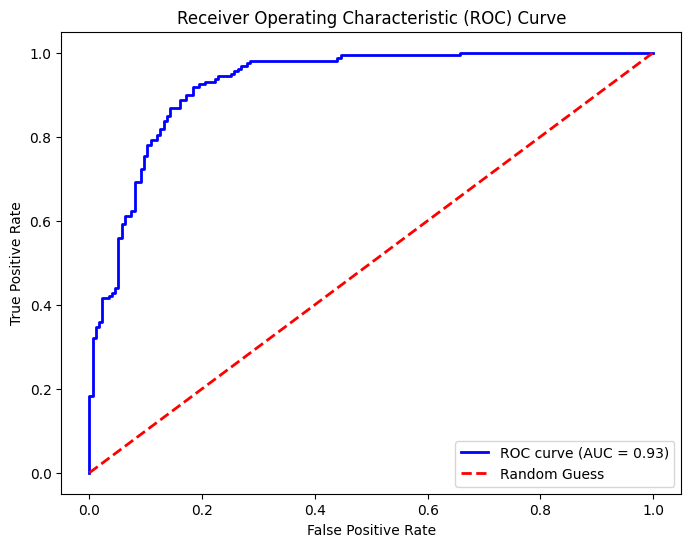

In [620]:
import matplotlib.pyplot as plt

# after computing the ROC curve (fpr, tpr) and calculated the AUC-ROC (auc) as described earlier
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## AGE GROUP

In [621]:
# Define age groups (you can adjust these boundaries as needed)
bins = [0, 30, 40, 50, 60, 100]
labels = ['0-29', '30-39', '40-49', '50-59', '60+']
sampled_data_new['age_group'] = pd.cut(sampled_data_new['age'], bins=bins, labels=labels, right=False)

#print the dataframe with the new "age_group" column
print(sampled_data_new[['age','age_group']])

       age age_group
32884   57     50-59
32206   33     30-39
9403    36     30-39
14020   27      0-29
17201   58     50-59
...    ...       ...
37471   36     30-39
23440   41     40-49
29431   46     40-49
16627   31     30-39
1871    59     50-59

[6361 rows x 2 columns]


C:\Users\Windows\AppData\Local\Temp\ipykernel_11736\2818861091.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_data_new['age_group'] = pd.cut(sampled_data_new['age'], bins=bins, labels=labels, right=False)


In [622]:
import statsmodels.api as sm

# Assuming 'sampled_data_new' is your DataFrame containing 'y', 'contact', and 'age_group' columns
age_groups = sampled_data_new['age_group'].unique()

for age_group in age_groups:
    # Subset data for the specific age group
    subset_data = sampled_data_new[sampled_data_new['age_group'] == age_group].copy()

    # Prepare the data for logistic regression
    subset_data['contact'] = subset_data['contact'].astype('category').cat.codes  # Encode 'contact' as numerical

    # Add a constant term to the predictor variable
    X = sm.add_constant(subset_data['contact'])  

    # Fit logistic regression model
    logit_model = sm.Logit(subset_data['y'], X)
    result = logit_model.fit()

    # Print the summary of the logistic regression analysis
    print(f"\nLogistic Regression Results for Age Group: {age_group}\n")
    print(result.summary())



Optimization terminated successfully.
         Current function value: 0.387731
         Iterations 6

Logistic Regression Results for Age Group: 50-59

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  889
Model:                          Logit   Df Residuals:                      887
Method:                           MLE   Df Model:                            1
Date:                Wed, 17 Jan 2024   Pseudo R-squ.:                 0.02026
Time:                        02:32:27   Log-Likelihood:                -344.69
converged:                       True   LL-Null:                       -351.82
Covariance Type:            nonrobust   LLR p-value:                 0.0001593
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6296      0.110    -14.752      0.000   

## INSIGHT DRAWN FROM THE DATA ANALYSED

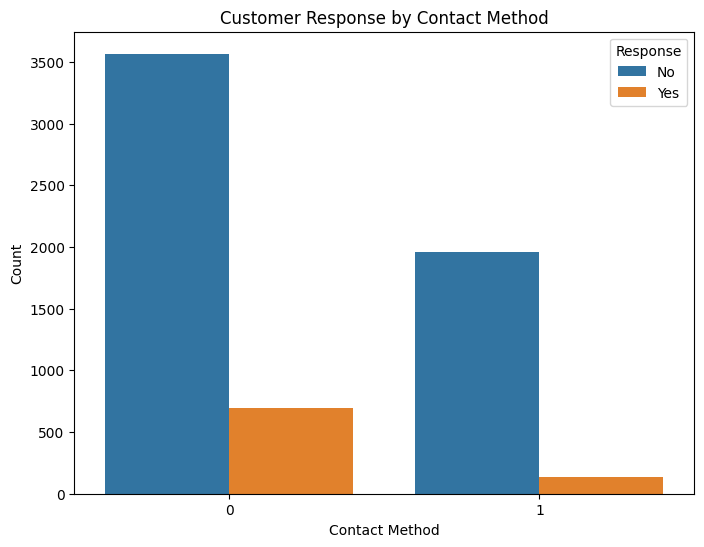

In [623]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Bank_market_clean' is your cleaned DataFrame
plt.figure(figsize=(8, 6))
sns.countplot(x='contact', hue='y', data=sampled_data_new)
plt.title('Customer Response by Contact Method')
plt.xlabel('Contact Method')
plt.ylabel('Count')
plt.legend(title='Response', labels=['No', 'Yes'])
plt.show()


In [624]:
# Assuming 'df' is your DataFrame containing the 'age' column
# Define age groups (you can adjust these boundaries as needed)
bins = [0, 30, 40, 50, 60, 100]
labels = ['0-29', '30-39', '40-49', '50-59', '60+']
sampled_data_new['age'] = pd.cut(sampled_data_new['age'], bins=bins, labels=labels, right=False)


C:\Users\Windows\AppData\Local\Temp\ipykernel_11736\4269984693.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_data_new['age'] = pd.cut(sampled_data_new['age'], bins=bins, labels=labels, right=False)


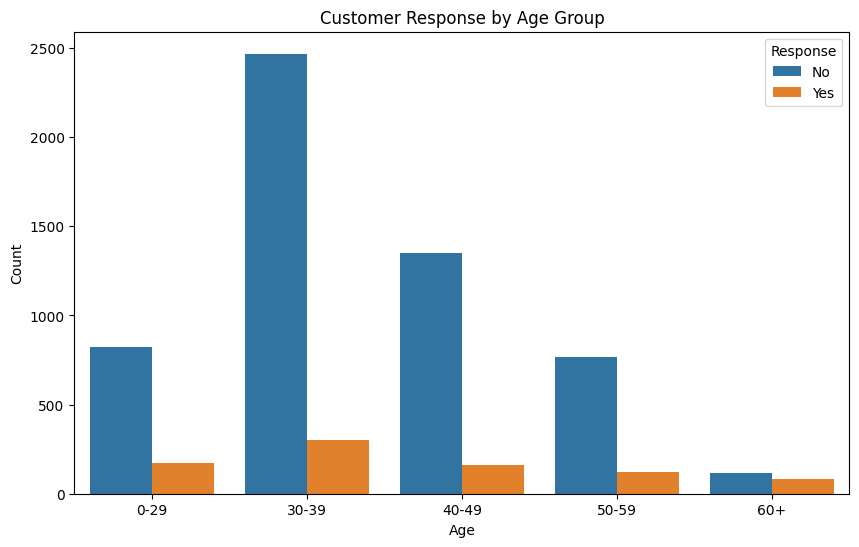

In [625]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='y', data=sampled_data_new, order=['0-29', '30-39', '40-49', '50-59', '60+'])
plt.title('Customer Response by Age Group')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Response', labels=['No', 'Yes'])
plt.show()